# DU-Euler法によるパラメータ学習

Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [1]:
using LinearAlgebra
using Plots
gr()
using Random
Random.seed!(1)
using Flux

### グローバル定数の設定

In [2]:
T = 10.0
N = 1000
η = T/N

0.01

### オイラー法

In [3]:
function Euler(p)
    x = ones(2)
    x_trj = zeros(N)
    y_trj = zeros(N)
    for i in 1:N
            x[1] = x[1] + (p[1]*x[1] - p[2]*x[1]*x[2])*η
            x[2] = x[2] + (-p[3]*x[2] + p[4]*x[1]*x[2])*η
            x_trj[i] = x[1]
            y_trj[i] = x[2]
    end
    return x_trj, y_trj 
end

Euler (generic function with 1 method)

### Lotka-Volterra方程式の解のプロット

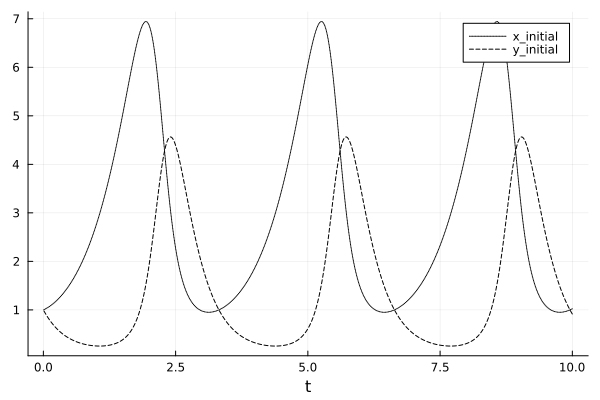

In [4]:
p = [1.5, 1.0, 3.0, 1.0]
x, y = Euler(p)
plot(η:η:T, x,  label = "x_initial", color=:black, xlabel="t", ls=:dot)
plot!(η:η:T, y, label = "y_initial", color=:black, xlabel="t",ls=:dash)

### DU-Euler法

In [5]:
function DU_Euler(p_αδ, p_βγ)
    x = ones(2)
    loss = 0.0
    for i in 1:N
        x = x + (p_αδ.*x + p_βγ*prod(x))*η
        loss += norm(x - 1*ones(2))^2
    end
    return loss
end        

DU_Euler (generic function with 1 method)

### 学習プロセス

In [6]:
opt = Flux.ADAM(1e-1) 
train_itr = 50

p = [1.5, 1.0, 3.0, 1.0]
p_αδ = [p[1], -p[3]]
p_βγ = [-p[2], p[4]]

ps = Flux.params(p_αδ, p_βγ)
for i in 1:train_itr
    gs = Flux.gradient(ps) do
        DU_Euler(p_αδ, p_βγ)
    end
    Flux.Optimise.update!(opt, ps, gs)
end

p_train = [p_αδ[1], -p_βγ[1], -p_αδ[2], p_βγ[2]]

4-element Vector{Float64}:
 1.5520903191984934
 1.6416740960739704
 1.9061914775482762
 2.1134752815320326

### 学習結果の表示

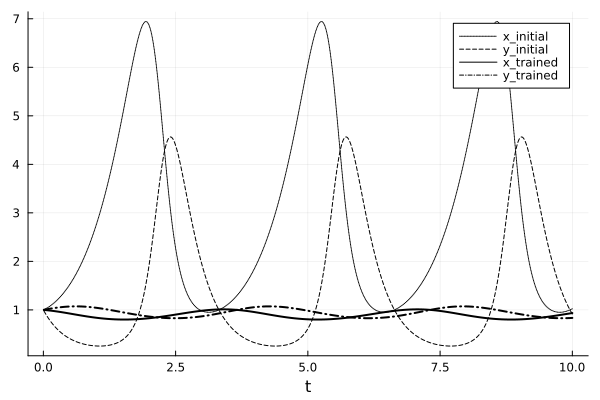

In [7]:
x, y = Euler(p_train)
plot!(η:η:T, x,  label = "x_trained",  color=:black,lw=2)
plot!(η:η:T, y, label = "y_trained",  color=:black,ls=:dashdot,lw=2)

In [8]:
savefig("DU-Euler-LV.pdf")

"/Users/wadayama/Dropbox/DU-Book_test/Chapter_6/DU-Euler-LV.pdf"